In [ ]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/bf/45/c961e3cb6ddad76b3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# We have to project Yes or NO

In [4]:
# DIVIDE DATASET INTO X AND Y
X = df.iloc[:, 3:13]
y = df.iloc[:,13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [6]:
# Categories converting into one-hot encoding
geography = pd.get_dummies(X['Geography'])
gender = pd.get_dummies(X['Gender'])

In [7]:

X.drop(['Geography','Gender'],axis=1)
X = X.drop(['Geography','Gender'],axis=1)

In [8]:
#Concatination
X = pd.concat([X,geography,gender],axis=1)

In [9]:
# Train test split
from sklearn.model_selection import train_test_split


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [11]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [12]:
X_test = sc.transform(X_test)

In [13]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -0.57369368,
         1.09168714, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  1.74309049,
         1.09168714, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  1.74309049,
        -0.91601335,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ..., -0.57369368,
        -0.91601335,  0.91601335]])

In [14]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -0.57369368,
         1.09168714, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  1.74309049,
         1.09168714, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  1.74309049,
        -0.91601335,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ..., -0.57369368,
        -0.91601335,  0.91601335]])

In [15]:
X_train.shape

(8000, 13)

In [16]:
X_test.shape

(2000, 13)

In [ ]:
# Sequential --> Forward and backward prapogation
# Dense --> Creating Circle layers --> Input ,Hidden, Output
# Activation Function
# Dropout --> Deactivating the layers

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU # Activation functions
from tensorflow.keras.layers import Dropout

In [18]:
# ANN Implimentation
classifier = Sequential()

In [19]:
# Inserting input layers
classifier.add(Dense(units=11,activation='relu'))  # 11 input layers

In [20]:
# Adding first hidden layers
classifier.add(Dense(units=7,activation='relu'))

In [21]:
# Adding second hidden layers
classifier.add(Dense(units=6,activation='relu'))

In [22]:
# Output layer
classifier.add(Dense(1,activation='sigmoid'))

In [23]:
from keras import metrics

In [24]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [25]:
from sklearn.utils import validation
model_score = classifier.fit(X_train,y_train, validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 4s 5ms/step - loss: 0.4749 - accuracy: 0.7962 - val_loss: 0.4441 - val_accuracy: 0.7955
Epoch 2/50
536/536 [==============================] - 1s 3ms/step - loss: 0.4240 - accuracy: 0.7962 - val_loss: 0.4246 - val_accuracy: 0.7955
Epoch 3/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4048 - accuracy: 0.8059 - val_loss: 0.4095 - val_accuracy: 0.8175
Epoch 4/50
536/536 [==============================] - 2s 3ms/step - loss: 0.3897 - accuracy: 0.8326 - val_loss: 0.3986 - val_accuracy: 0.8205
Epoch 5/50
536/536 [==============================] - 2s 3ms/step - loss: 0.3774 - accuracy: 0.8457 - val_loss: 0.3887 - val_accuracy: 0.8338
Epoch 6/50
536/536 [==============================] - 1s 3ms/step - loss: 0.3678 - accuracy: 0.8503 - val_loss: 0.3806 - val_accuracy: 0.8387
Epoch 7/50
536/536 [==============================] - 1s 3ms/step - loss: 0.3600 - accuracy: 0.8539 - val_loss: 0.3771 - val_accuracy: 0.8466
Epoch 

In [26]:
model_score.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

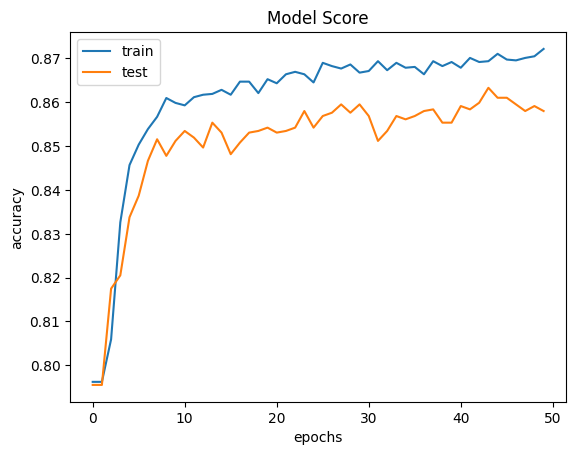

In [28]:
plt.plot(model_score.history['accuracy'])
plt.plot(model_score.history['val_accuracy'])
plt.title('Model Score')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc = 'upper left')
plt.show()